In [ ]:
using Plots
@time include("../src/federn/federn.jl");

In [20]:
#switch between peturbed and unperturbed Lzz versions

#Lzz = [rho_error(z-z2) for z in zs, z2 in zs] # unperturbed
#Lzz = [rho_error(z-z2) for z in zps, z2 in zs]  # perturbed


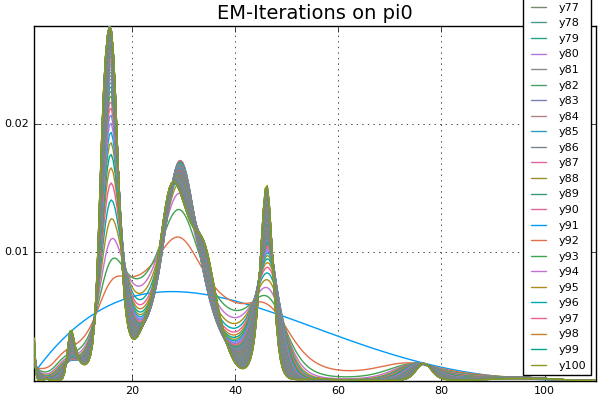

In [21]:
# define beta distribution prior, and get corresponding sampling weights
s = xmax+1
pi_0(x) = (x/s).*(1-x/s).^3.*(x/s.>0).*(x/s.<1)*20/s
betaw=map(pi_0, samples)
betaw=betaw/sum(betaw)

w0 = betaw

title = "EM-Iterations on pi0"
plot(samples, ws_em(betaw, 100), title=title)

In [22]:
# compare different zentropies
randw = rand(300)
randw = randw/sum(randw)
unitw = ones(300) / 300

@show zentropy(randw)
@show zentropy(unitw)
@show zentropy(betaw)

zentropy(randw) = 5.879060503048758
zentropy(unitw) = 5.87116766617912
zentropy(betaw) = 5.911035544384982


5.911035544384982

In [23]:
# dictionary for different weightings
wdict = Dict{String, Vector{Vector{Float64}}}()
niter = 50;

In [ ]:
# gradientascent penalized max. likelihood
# with stepsize `h` and entropy weighting `s`
gapml(w0, niter, h=1, s=1) = gradientascent(x->pml(x,s), w0, niter, h, GynC.projectsimplex)

In [ ]:
# em algorithm
wdict["em"]  = ws_em(w0, niter)

# penalized maximum lilkelihood with different stepsizes and entropy weights
wdict["pml e-7"] =     gapml(w0, niter, 0.0000001)
wdict["pml e-6"] =     gapml(w0, niter, 0.000001)
wdict["pml e-6 se1"] = gapml(w0, niter, 0.000001, 10)
wdict["pml e-6 se3"] = gapml(w0, niter, 0.000001, 1000)

# maximal likelihood (setting entropy weight to 0)
wdict["l   e-6  s0"] = gapml(w0, niter, 0.000001, 0)

# zentropy maximization
wdict["ze e-3"] = gradientascent(x->zentropy(x), w0, niter, 0.001, GynC.projectsimplex);


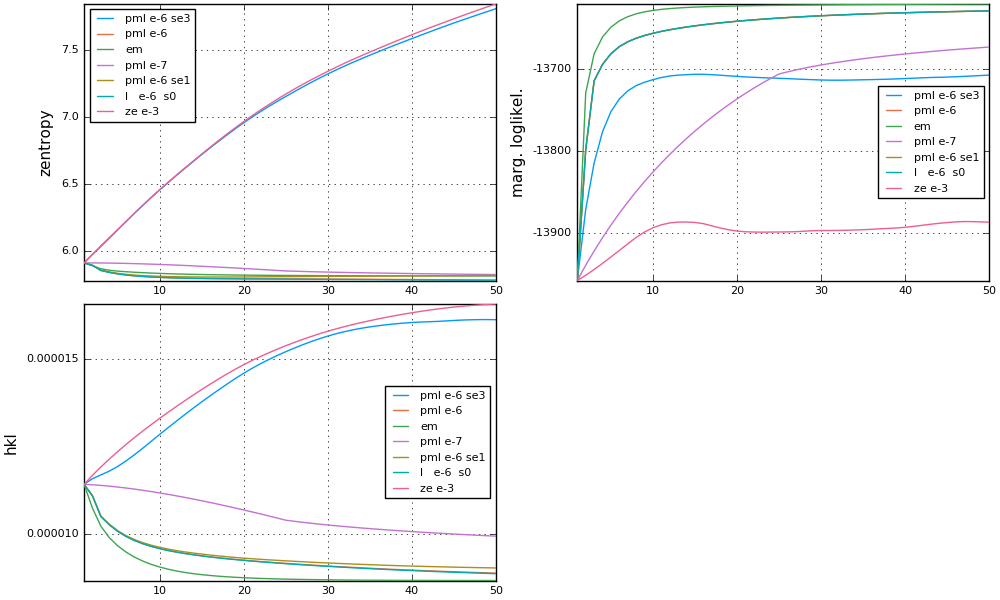

In [28]:
include("../src/optim3.jl")

zeplot = plot(yaxis="zentropy")
mlplot = plot(yaxis="marg. loglikel.")
hklplot = plot(yaxis="hkl")

for (key, ws) in wdict
    plot!(zeplot, map(zentropy, ws), label=key)
    plot!(mlplot, map(marginallikelihood, ws), label=key)
    plot!(hklplot, map(w->HKL(w,Lzz), ws), label=key)
end
plot(zeplot, mlplot, hklplot, size=(1000,600))


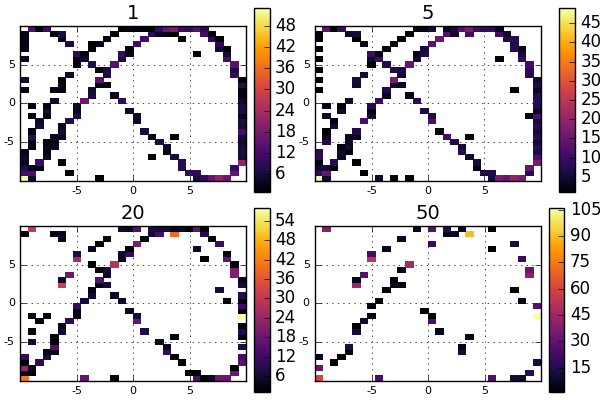

In [30]:
ww=wdict["ze e-3"]

# histogram in Z
function zplot(w; args...)
    zsmpls = sample(GynC.WeightedSampling(zs, w), 1000)
    histogram2d(map(x->x[1], zsmpls), map(x->x[2], zsmpls); args...)
end
plot([zplot(ww[i], title=i) for i=[1,5,20,50]]...)


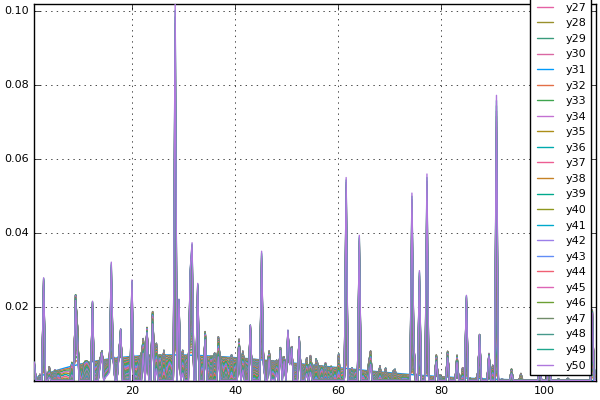

In [31]:
# plot iterations in x
function plotiters(ws; kwargs...)
    plot(samples,hcat(ws...), kwargs...)
end

plotiters(ww)

In [233]:
# unperturbed z samples
temp = hcat(zs...)
p1 = scatter(temp[1,:],temp[2,:])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -10 
 
 
 0 
 
 
 10 
 
 
 -10 
 
 
 0 
 
 
 10 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1


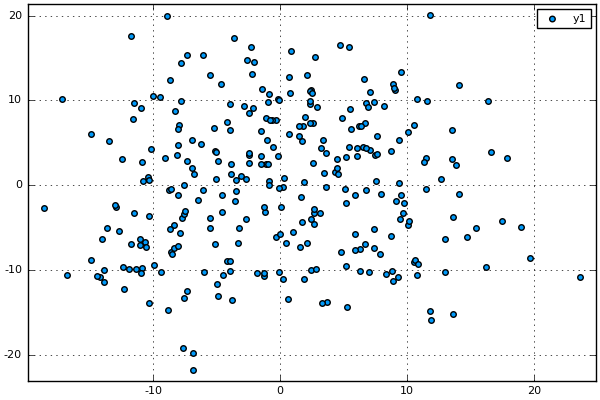

In [33]:
# perturbed z samples (1 z- per 1 x-sample)
temp = hcat(zps...)
scatter(temp[1,:],temp[2,:])

In [168]:
# generate multiple, perturbed z-meas. per x 

nerrspl = 200 # n error samples

ntimes(w,n) = repeat(w, inner=[n]) / n
ntimespert(zs, n) = map(x -> x+randn(2) * rho_std, ntimes(zs, n));

# adapt the Lzz matrix
Lzzbig = [rho_error(z-zp) for zp in ntimespert(zs, nerrspl), z in zs];

In [ ]:
# "kullbach leibler entropy"
include("../src/optim3.jl")
gahkl(w0, niter, h=1, s=1) = gradientascent(w->HKL(w, Lzzbig, ntimes(w, nerrspl)), w0, niter, h, GynC.projectsimplex)

@time hkl = gahkl(w0, 10, 1e2);

push!(wdict, "hkl" => hkl)


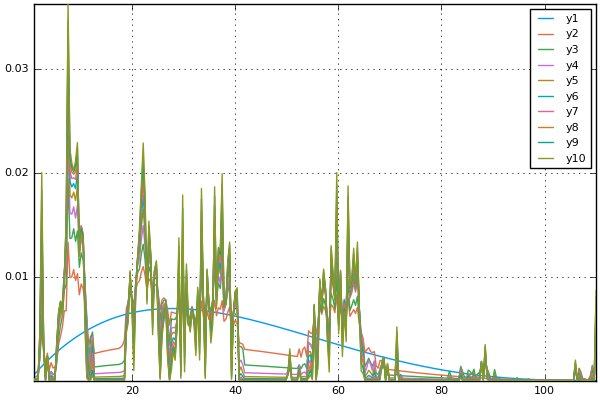

In [70]:
plotiters(hkl)

In [71]:
(hkl[end] .== 0) |> any

false

In [200]:
using KernelDensity

function priorpredictivekde(w)
  zsx = map(x->x[1], zs)
  zsy = map(x->x[2], zs)

  k=kde((zsx,zsy), weights = w, bandwidth=(5.,5.))
  k.x, k.y, k.density
end

function plot_priorpredictivedistr(w; kwargs...)
  contour(priorpredictivekde(w)..., title="Prior predictive distribution"; kwargs...)
end

plot_priorpredictivedistr (generic function with 1 method)

In [240]:
using Interact

@manipulate for x in wdict, a in 1:niter
  w=x[a]
  println(a)
  p2 = plot_priorpredictivedistr(w, clims=(0,0.002), levels=20, xlim=(-15, 15), ylim=(-15,15))
  p3 = plot(p1, xlim=(-15,15), ylim=(-15,15))
  plot(p2,p3,size=(1000,500))
end

Interact.Options{:ToggleButtons,Any}(Signal{Any}(Array{Float64,1}[[0.000576205,0.000778468,0.000976634,0.00117074,0.00136084,0.00154696,0.00172914,0.00190743,0.00208187,0.00225249,0.00241935,0.00258246,0.00274188,0.00289765,0.0030498,0.00319837,0.00334341,0.00348494,0.00362302,0.00375767,0.00388893,0.00401685,0.00414145,0.00426279,0.00438089,0.00449579,0.00460753,0.00471615,0.00482167,0.00492415,0.00502361,0.00512009,0.00521363,0.00530426,0.00539202,0.00547694,0.00555905,0.0056384,0.00571502,0.00578894,0.0058602,0.00592882,0.00599485,0.00605832,0.00611926,0.00617771,0.00623369,0.00628725,0.00633841,0.00638721,0.00643367,0.00647784,0.00651974,0.00655941,0.00659687,0.00663217,0.00666532,0.00669637,0.00672534,0.00675227,0.00677717,0.0068001,0.00682107,0.00684011,0.00685726,0.00687254,0.00688599,0.00689763,0.0069075,0.00691562,0.00692202,0.00692673,0.00692977,0.00693119,0.00693099,0.00692922,0.0069259,0.00692106,0.00691472,0.00690692,0.00689767,0.00688701,0.00687497,0.00686156,0.00684681,0.00683076,0.00681343,0.00679484,0.00677502,0.00675399,0.00673178,0.00670841,0.00668392,0.00665831,0.00663163,0.00660389,0.00657511,0.00654532,0.00651455,0.00648282,0.00645014,0.00641655,0.00638206,0.00634671,0.00631051,0.00627348,0.00623565,0.00619703,0.00615766,0.00611755,0.00607673,0.0060352,0.00599301,0.00595016,0.00590668,0.00586259,0.00581791,0.00577266,0.00572685,0.00568052,0.00563367,0.00558633,0.00553852,0.00549025,0.00544155,0.00539244,0.00534293,0.00529304,0.00524278,0.00519219,0.00514127,0.00509004,0.00503852,0.00498673,0.00493469,0.00488241,0.0048299,0.00477719,0.00472429,0.00467122,0.00461799,0.00456462,0.00451112,0.00445752,0.00440382,0.00435004,0.00429619,0.0042423,0.00418837,0.00413442,0.00408046,0.00402651,0.00397258,0.00391868,0.00386483,0.00381104,0.00375733,0.0037037,0.00365018,0.00359676,0.00354347,0.00349032,0.00343731,0.00338447,0.00333179,0.0032793,0.00322701,0.00317492,0.00312304,0.00307139,0.00301999,0.00296882,0.00291792,0.00286728,0.00281693,0.00276685,0.00271708,0.00266761,0.00261846,0.00256962,0.00252113,0.00247297,0.00242516,0.00237771,0.00233062,0.00228391,0.00223757,0.00219162,0.00214607,0.00210092,0.00205618,0.00201186,0.00196795,0.00192447,0.00188143,0.00183883,0.00179667,0.00175497,0.00171372,0.00167293,0.00163261,0.00159276,0.00155338,0.00151449,0.00147608,0.00143816,0.00140073,0.0013638,0.00132737,0.00129144,0.00125602,0.00122111,0.00118671,0.00115282,0.00111945,0.0010866,0.00105427,0.00102247,0.000991185,0.000960431,0.000930204,0.000900506,0.000871337,0.000842699,0.000814592,0.000787016,0.000759972,0.00073346,0.000707479,0.000682029,0.00065711,0.00063272,0.00060886,0.000585527,0.000562721,0.00054044,0.000518683,0.000497447,0.000476732,0.000456534,0.000436851,0.00041768,0.00039902,0.000380866,0.000363217,0.000346068,0.000329416,0.000313258,0.00029759,0.000282407,0.000267706,0.000253481,0.00023973,0.000226446,0.000213625,0.000201261,0.00018935,0.000177887,0.000166864,0.000156277,0.000146119,0.000136384,0.000127066,0.000118159,0.000109655,0.000101547,9.38285e-5,8.64922e-5,7.95304e-5,7.29355e-5,6.66995e-5,6.08145e-5,5.52722e-5,5.00641e-5,4.51817e-5,4.06162e-5,3.63587e-5,3.23998e-5,2.87305e-5,2.5341e-5,2.22217e-5,1.93628e-5,1.67541e-5,1.43854e-5,1.22463e-5,1.03261e-5,8.61399e-6,7.09907e-6,5.77013e-6,4.61581e-6,3.62458e-6,2.7847e-6,2.08429e-6,1.51124e-6,1.05329e-6,6.97982e-7,4.32675e-7,2.44547e-7,1.20592e-7,4.76203e-8],[0.00105895,0.000648202,0.000711535,0.00112086,0.00102913,0.00211213,0.00121902,0.0012039,0.00168939,0.00167225,0.00186605,0.00221892,0.00225377,0.00246421,0.00241855,0.00255606,0.00275304,0.00287213,0.00295973,0.00302747,0.00390395,0.0034745,0.00515625,0.00488475,0.00422325,0.00381057,0.00431008,0.00467165,0.00477892,0.00476035,0.00461912,0.0056462,0.005059,0.00514221,0.0053113,0.00550916,0.00570961,0.00570372,0.00585832,0.00595036,0.00610374,0.00669702,0.00629048,0.0062374,0.00625487,0.00649715,0.00674667,0.00646433,0.00640141,0.00646317,0.00651092,0.00659574,0.00737611,0.00656284,0.00664828,0.006

Interact.Slider{Int64}(Signal{Int64}(25, nactions=0),"a",25,1:50,"d",true)

25


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -15 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 -15 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 Prior predictive distribution 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#170b3a; stroke-width:1; stroke-opacity:1; fill:none" points="
 66.008,447.811 66.4411,448.339 69.0923,451.4 69.2766,451.604 72.112,454.565 72.5449,454.99 74.9475,457.26 76.4482,458.579 77.7829,459.716 80.6184,461.951 
 80.9126,462.168 83.4538,463.996 86.1428,465.757 86.2893,465.851 89.1247,467.551 91.9602,469.085 92.4847,469.346 94.7956,470.487 97.6311,471.75 100.467,472.881 
 100.617,472.936 103.302,473.911 106.137,474.828 108.973,475.638 111.808,476.35 112.597,476.525 114.644,476.984 117.479,477.537 120.315,478.013 123.15,478.416 
 125.986,478.754 128.821,479.034 131.657,479.259 134.492,479.437 137.327,479.573 140.163,479.673 142.998,479.74 145.834,479.781 148.669,479.8 151.505,479.801 
 154.34,479.789 157.176,479.768 160.011,479.74 162.847,479.711 165.682,479.682 168.517,479.656 171.353,479.636 174.188,479.623 177.024,479.62 179.859,479.627 
 182.695,479.646 185.53,479.677 188.366,479.72 191.201,479.776 194.036,479.843 196.872,479.922 199.707,480.012 202.543,480.112 202.589,480.114 205.378,480.228 
 208.214,480.351 211.049,480.481 213.885,480.616 216.72,480.754 219.556,480.894 221.998,481.015 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#170b3a; stroke-width:1; stroke-opacity:1; fill:none" points="
 281.432,481.015 281.936,480.97 284.771,480.68 287.606,480.349 289.392,480.114 290.442,479.983 293.277,479.586 296.113,479.142 298.948,478.648 301.784,478.099 
 304.619,477.494 307.455,476.826 308.635,476.525 310.29,476.117 313.126,475.356 315.961,474.523 318.796,473.612 320.74,472.936 321.632,472.633 324.467,471.603 
 327.303,470.478 329.926,469.346 330.138,469.257 332.974,467.985 335.809,466.598 337.412,465.757 338.645,465.118 341.48,463.546 343.776,462.168 344.315,461.846 
 347.151,460.056 349.317,458.579 349.986,458.122 352.822,456.074 354.228,454.99 355.657,453.88 358.493,451.525 358.636,451.4 361.328,449.033 362.635,447.811 
 364.164,446.356 366.285,444.222 366.999,443.487 369.638,440.633 369.835,440.414 372.67,437.123 372.736,437.044 375.505,433.591 375.611,433.454 378.287,429.865 
 378.341,429.79 380.79,426.276 381.176,425.697 383.134,422.687 384.012,421.273 385.334,419.097 386.847,416.475 387.397,415.508 389.343,411.919 389.683,411.264 
 391.19,408.33 392.518,405.585 392.924,404.741 394.578,401.151 395.354,399.375 396.063,397.749 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#170b3a; stroke-width:1; stroke-opacity:1; fill:none" points="
 396.063,76.0294 395.354,74.8026 395.198,74.533 393.063,70.9438 392.518,70.0593 390.847,67.3545 389.683,65.5362 388.543,63.7653 386.847,61.2163 386.15,60.1761 
 384.012,57.0798 383.668,56.5869 381.176,53.11 381.095,52.9977 378.432,49.4085 378.341,49.2888 375.671,45.8193 375.505,45.609 372.805,42.23 372.67,42.0647 
 369.835,38.6478 369.829,38.6408 366.999,35.3406 366.746,35.0516 364.164,32.1439 363.543,31.4624 361.328,29.0534 360.213,27.8732 358.493,26.0662 356.745,24.284 
 355.856,23.3815 
 "/>
 
<polyline clip-path="url(#clip02)" style="stroke:#170b3a; stroke-width:1; stroke-opacity:1; fill:none" points="
 34.5407,282.92 35.0507,286.297 35.2511,287.769 35.5307,289.886 35.9545,293.475 36.3309,297.064 36.6613,300.653 36.9477,304.243 37.1926,307.832 37.3992,311.421 
 37.5714,315.01 37.7132,318.599 37.8293,322.189 37.9246,325.778 38.0041,329.367 38.0731,332.956 38.0866,333.719 38.1351,336.546 38.1968,340.135 38.2639,343.724 
 38.3416,347.313 38.4351,350.902 38.5492,354.492 38.6892,358.081 38.8599,361.67 39.0663,365.259 39.3132,368.848 39.6056,372.438 39.9484,376.027 40.3466,379.616 
 40.8054,383.205 40.922,384.012 41.3194,386.795 41.9003,390.384 42.5569,393.973 43.2952,397.562 43.7575,399.587 44.1137,401.151 45.0156,404.741 

In [201]:
# compute the zentropy based on the kde instead of plain monte carlo integration
# i.e. on a regular grid, instead of the x samples
function zentropykde(w)
  h=0.
  kdew = priorpredictivekde(w)[3]
  kdew = kdew / sum(kdew)
  for d in kdew      
      h-=d*log(d)
  end
  h
end

zentropykde (generic function with 1 method)

In [202]:
w = wdict["ze e-3"][end]
map(zentropykde, [w0, w])

# zentropy on kde, decreasing :/

2-element Array{Float64,1}:
 10.2898
 10.223 

In [203]:
map(w->GynC.Hz(w, Lzzbig, ntimes(w, nerrspl)), [w0, w])

# zentropy on the with perturbed z samples

2-element Array{Float64,1}:
 11.0255
 11.0377

In [219]:
# initialize error distribution
err = Distributions.MvNormal(2,5.)

# compute uniform z grid
zs_uniform = reshape([[x,y] for x in k.x, y in k.y], 256*256)

# compute likelihoods on grid
@time L_zuni_x = [pdf(err, z-z2) for z in zs_uniform, z2 in zs]

# compute rhozw on grid

function rhozw_f(w) 
    r = L_zuni_x * w
    r/sum(r)
end

 14.746670 seconds (137.66 M allocations: 5.128 GB, 38.60% gc time)


rhozw_f (generic function with 1 method)

In [220]:
# compute z entropies on the uniform (kde) grid
map(w->GynC.Hz(w, L_zuni_x, rhozw_f(w)), [w0, w])

2-element Array{Float64,1}:
 10.8603
 10.8134

In [223]:
# optimize for z entropy with the uniform grid
gwdict["Hzuni"] = gradientascent(w->GynC.Hz(w, L_zuni_x, rhozw_f(w)), w0, 10, 0.01, GynC.projectsimplex)

10-element Array{Any,1}:
 [0.000576205,0.000778468,0.000976634,0.00117074,0.00136084,0.00154696,0.00172914,0.00190743,0.00208187,0.00225249  …  3.62458e-6,2.7847e-6,2.08429e-6,1.51124e-6,1.05329e-6,6.97982e-7,4.32675e-7,2.44547e-7,1.20592e-7,4.76203e-8]       
 [0.000288103,0.000530933,0.00134489,0.00188053,0.00213546,0.00217865,0.00208783,0.00194868,0.00185212,0.0018727  …  0.000429162,0.000495571,0.000562774,0.000630416,0.000698128,0.00076552,0.000832197,0.000897759,0.000961811,0.00102397]
 [0.000144051,0.000265467,0.00145697,0.00227456,0.00256201,0.00245654,0.00211779,0.00171984,0.00143993,0.0014131  …  0.000460494,0.000578333,0.000698608,0.000820627,0.000943654,0.00106691,0.00118961,0.00131092,0.00143004,0.0015462]    
 [7.20256e-5,0.000132733,0.00156494,0.00262949,0.00293171,0.00267669,0.00210648,0.00148257,0.00106288,0.00103197  …  0.000354825,0.000516884,0.00068334,0.000853183,0.00102533,0.00119862,0.00137186,0.00154383,0.00171331,0.00187912]     
 [3.60128e-5,6.63667e-5,0.00170

In [232]:
w = wdict["Hzuni"][end]
# resulting x prior
plot(samples, w)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 40 
 
 
 60 
 
 
 80 
 
 
 100 
 
 
 0.005 
 
 
 0.010 
 
 
 0.015 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 52.3185,380.989 54.137,380.967 55.9555,316.768 57.7741,268.624 59.5926,265.15 61.4112,292.779 63.2297,334.926 65.0483,374.209 66.8668,380.399 68.6854,380.359 
 70.5039,359.895 72.3224,315.462 74.141,267.844 75.9595,224.203 77.7781,186.019 79.5966,151.283 81.4152,117.84 83.2337,85.3858 85.0522,55.5036 86.8708,30.6161 
 88.6893,12.946 90.5079,3.93701 92.3264,4.17741 94.145,13.6458 95.9635,31.9468 97.782,58.3993 99.6006,91.9913 101.419,131.298 103.238,174.399 105.056,218.896 
 106.875,262.085 108.693,301.305 110.512,334.347 112.33,359.827 114.149,376.469 115.967,379.873 117.786,380.346 119.605,380.442 121.423,380.425 123.242,380.314 
 125.06,379.947 126.879,376.502 128.697,369.739 130.516,360.939 132.334,349.538 134.153,335.253 135.971,318.162 137.79,298.693 139.609,277.536 141.427,255.524 
 143.246,233.521 145.064,212.327 146.883,192.63 148.701,174.978 150.52,159.787 152.338,147.355 154.157,137.882 155.975,131.486 157.794,128.213 159.613,128.036 
 161.431,130.853 163.25,136.474 165.068,144.61 166.887,154.866 168.705,166.739 170.524,179.633 172.342,192.899 174.161,205.872 175.979,217.926 177.798,228.524 
 179.617,237.263 181.435,243.899 183.254,248.357 185.072,250.726 186.891,251.224 188.709,250.159 190.528,247.871 192.346,244.682 194.165,240.864 195.983,236.614 
 197.802,232.052 199.62,227.221 201.439,222.114 203.258,216.698 205.076,210.948 206.895,204.878 208.713,198.549 210.532,192.086 212.35,185.661 214.169,179.486 
 215.987,173.804 217.806,168.854 219.624,164.856 221.443,161.999 223.262,160.432 225.08,160.258 226.899,161.536 228.717,164.281 230.536,168.477 232.354,174.075 
 234.173,181.009 235.991,189.197 237.81,198.55 239.628,208.97 241.447,220.35 243.266,232.575 245.084,245.518 246.903,259.034 248.721,272.962 250.54,287.118 
 252.358,301.299 254.177,315.278 255.995,328.816 257.814,341.659 259.632,353.555 261.451,364.263 263.27,372.897 265.088,376.539 266.907,378.108 268.725,378.944 
 270.544,379.436 272.362,379.742 274.181,379.882 275.999,379.968 277.818,380.005 279.636,379.962 281.455,379.796 283.273,378.493 285.092,374.83 286.911,371.588 
 288.729,368.897 290.548,366.809 292.366,365.294 294.185,364.247 296.003,363.501 297.822,362.842 299.64,362.03 301.459,360.821 303.277,358.985 305.096,356.325 
 306.915,352.69 308.733,347.985 310.552,342.175 312.37,335.282 314.189,327.386 316.007,318.613 317.826,309.125 319.644,299.112 321.463,288.78 323.281,278.338 
 325.1,267.992 326.919,257.936 328.737,248.346 330.556,239.379 332.374,231.167 334.193,223.82 336.011,217.426 337.83,212.055 339.648,207.756 341.467,204.562 
 343.285,202.494 345.104,201.559 346.923,201.754 348.741,203.063 350.56,205.462 352.378,208.916 354.197,213.38 356.015,218.799 357.834,225.104 359.652,232.214 
 361.471,240.037 363.289,248.465 365.108,257.377 366.927,266.638 368.745,276.106 370.564,285.63 372.382,295.056 374.201,304.232 376.019,313.012 377.838,321.264 
 379.656,328.873 381.475,335.746 383.293,341.821 385.112,347.064 386.93,351.48 388.749,355.104 390.568,358.007 392.386,360.289 394.205,362.075 396.023,363.508 
 397.842,364.74 399.66,365.923 401.479,367.206 403.297,368.719 405.116,370.571 406.934,372.843 408.753,375.581 410.572,378.49 412.39,379.95 414.209,380.935 
 416.027,380.941 417.846,380.943 419.664,380.945 421.483,380.947 423.301,380.949 425.12,380.95 426.938,380.952 428.757,380.954 430.576,380.955 432.394,380.957 
 434.213,380.959 436.031,380.96 437.85,380.962 439.668,380.963 441.487,380.965 443.305,380.966 445.124,380.966 446.942,380.963 448.761,380.961 450.58,380.953 
 452.398,380.939 454.217,380.923 456.035,380.883 457.854,380.821 459.672,380.725 461.491,380.514 463.309,380.097 465.128,379.255 466.946,377.502 468.765,376.071 
 470.583,375.07

In [263]:
# were not reaching 0 possibility anywhere
map(minimum,wdict["Hzuni"])

10-element Array{Float64,1}:
 4.76203e-8
 8.37704e-6
 4.18852e-6
 2.09426e-6
 1.04713e-6
 5.23565e-7
 2.61783e-7
 1.30891e-7
 6.54457e-8
 3.27228e-8

In [243]:
# the prior predictive kde indead is smoothing out
map(w-> priorpredictivekde(w)[3] |> maximum, wdict["Hzuni"])

10-element Array{Float64,1}:
 0.00166512
 0.00147216
 0.00146646
 0.00146893
 0.00147344
 0.00147474
 0.00147354
 0.00146926
 0.00146297
 0.00145646